# Example: CitiBike data

Adapted from Kelsey Jordahl
https://gist.github.com/kjordahl/5957573

In [51]:
import requests  
import json
from pyproj import Proj
from shapely.geometry import Point
import geopandas as gp

NYC borough boundaries downloaded from [Bytes of the Big Apple](http://www.nyc.gov/html/dcp/download/bytes/nybb_13a.zip)

In [52]:
boros = gp.GeoDataFrame.from_file('nybb_15b/nybb.shp')
boros

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330466.075042,1.623827e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,741185.900596,1.937597e+09,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,897040.298576,3.045168e+09,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,358408.460709,6.364467e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464400.198868,1.186973e+09,(POLYGON ((1012821.805786133 229228.2645874023...


Load real time bike station data from [CitiBike](http://citibikenyc.com) json API:

In [53]:
# get the bike data and convert it to a ditcionary
endpoint_url = 'http://citibikenyc.com/stations/json'
response = requests.get(endpoint_url)
data = json.loads(response.text)

In [54]:
# convert the relevant part to a geodataframe
df = gp.GeoDataFrame(data['stationBeanList'])
df.head()

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,5,33,,72,,2018-02-21 09:21:58 PM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,1,31,,79,,2018-02-21 09:22:00 PM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33
2,,14,12,,82,,2018-02-21 09:21:54 PM,40.711174,,-74.000165,,St James Pl & Pearl St,,St James Pl & Pearl St,1,In Service,False,27
3,,19,40,,83,,2018-02-21 09:21:30 PM,40.683826,,-73.976323,,Atlantic Ave & Fort Greene Pl,,Atlantic Ave & Fort Greene Pl,1,In Service,False,62
4,,6,13,,119,,2018-02-21 09:23:39 PM,40.696089,,-73.978034,,Park Ave & St Edwards St,,Park Ave & St Edwards St,1,In Service,False,19


In [55]:
# there is one row for each bike station.  How many stations are there? 
len(df)

813

In [56]:
df['availableBikes']

0       5
1       1
2      14
3      19
4       6
5      17
6      18
7      15
8       0
9       5
10     24
11     29
12      6
13      0
14     20
15     26
16      0
17      2
18      0
19      0
20     14
21      0
22      1
23      2
24      2
25     15
26      1
27      4
28      5
29     36
       ..
783     0
784     0
785    27
786     0
787     2
788    14
789    21
790    15
791    12
792     0
793     0
794     1
795     1
796     0
797    21
798     1
799    10
800    12
801     6
802     7
803     2
804    31
805     7
806     7
807     1
808     9
809     2
810     0
811     0
812     0
Name: availableBikes, Length: 813, dtype: int64

In [57]:
# in the file above, there are lon-lats, but no geometry field
# we need to set that up

s = gp.GeoSeries([Point(x, y) for x, y in zip(df['longitude'], df['latitude'])])
df['geometry'] = s
df.crs = {'init': 'epsg:4326', 'no_defs': True}
df.geometry.total_bounds

array([-74.0969366 ,  40.65539977, -73.9077436 ,  40.81439444])

In [58]:
# make sure they are on the same CRS.  
# checking the bounds is a nice way of seeing this
df.to_crs(boros.crs, inplace=True)
df.geometry.total_bounds

array([  957370.14732176,   178056.37414829,  1009803.53178432,
         235986.42166716])

In [59]:
# the geometry objects can do lots of cool stuff.  For example: 

manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
print(sum(in_mn), 'stations in Manhattan')

414 stations in Manhattan


# Your turn

You can read about the range of operations available in geopandas here: 
    
http://geopandas.org/index.html

Your assignment is to: 

1. Calculate how many stations are in each borough
2. Calculate how many bikes are currently available in each borough
3. Read about and try at least two new spatial or geometric operations (beyond what I've covered here). 

In [60]:
boros

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330466.075042,1.623827e+09,(POLYGON ((970217.0223999023 145643.3322143555...
1,3,Brooklyn,741185.900596,1.937597e+09,(POLYGON ((1021176.479003906 151374.7969970703...
2,4,Queens,897040.298576,3.045168e+09,(POLYGON ((1029606.076599121 156073.8142089844...
3,1,Manhattan,358408.460709,6.364467e+08,(POLYGON ((981219.0557861328 188655.3157958984...
4,2,Bronx,464400.198868,1.186973e+09,(POLYGON ((1012821.805786133 229228.2645874023...


In [61]:
df.applymap?

In [62]:
staten_island = boros.geometry[0]
in_si = df.geometry.within(staten_island)
brooklyn = boros.geometry[1]
in_bn = df.geometry.within(brooklyn)
queens = boros.geometry[2]
in_qu = df.geometry.within(queens)
manhattan = boros.geometry[3]
in_mn = df.geometry.within(manhattan)
bronx = boros.geometry[4]
in_bx = df.geometry.within(bronx)
print( sum(in_si),'stations in Staten Island','\n',
      sum(in_bn),'stations in Brooklyn','\n',
      sum(in_qu),'stations in Queens','\n',
      sum(in_mn),'stations in Manhattan','\n',
      sum(in_bx),'stations in the Bronx') 

0 stations in Staten Island 
 266 stations in Brooklyn 
 81 stations in Queens 
 414 stations in Manhattan 
 0 stations in the Bronx


In [63]:
def availBikes(boro):
    availBoro = 0
    i=0
    while (i<len(df)):
        if (df['geometry'][i].within(boro)==True):
            availBoro = availBoro + df['availableBikes'][i]
        i=i+1
    return (availBoro)

In [64]:
print (availBikes(staten_island), 'bikes available in Staten Island','\n',
       availBikes(brooklyn),'bikes available in Brooklyn','\n',
       availBikes(queens),'bikes available in Queens','\n',
       availBikes(manhattan),'bikes available in Manhattan','\n',
       availBikes(bronx),'bikes available in the Bronx')

0 bikes available in Staten Island 
 2408 bikes available in Brooklyn 
 393 bikes available in Queens 
 4367 bikes available in Manhattan 
 0 bikes available in the Bronx


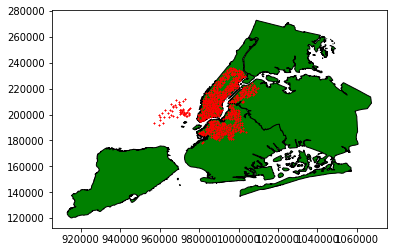

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
boros.plot(ax=ax, color='green', edgecolor='black')
df.plot(ax=ax, marker='x', color='red', markersize=1)
plt.show()